# NEOs dataset - Preprocessing

## 1. Exploring the dataset

In [39]:
import pandas as pd

# loading the csv in the form of a df
df_neos = pd.read_csv('nearest-earth-objects(1910-2024).csv')

df_neos.head()

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
0,2162117,162117 (1998 SD15),19.14,0.394962,0.883161,Earth,71745.401048,5.814362e+07,False
1,2349507,349507 (2008 QY),18.50,0.530341,1.185878,Earth,109949.757148,5.580105e+07,True
2,2455415,455415 (2003 GA),21.45,0.136319,0.304818,Earth,24865.506798,6.720689e+07,False
3,3132126,(2002 PB),20.63,0.198863,0.444672,Earth,78890.076805,3.039644e+07,False
4,3557844,(2011 DW),22.70,0.076658,0.171412,Earth,56036.519484,6.311863e+07,False


In [40]:
df_neos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338199 entries, 0 to 338198
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   neo_id                  338199 non-null  int64  
 1   name                    338199 non-null  object 
 2   absolute_magnitude      338171 non-null  float64
 3   estimated_diameter_min  338171 non-null  float64
 4   estimated_diameter_max  338171 non-null  float64
 5   orbiting_body           338199 non-null  object 
 6   relative_velocity       338199 non-null  float64
 7   miss_distance           338199 non-null  float64
 8   is_hazardous            338199 non-null  bool   
dtypes: bool(1), float64(5), int64(1), object(2)
memory usage: 21.0+ MB


In [41]:
# Checking for the number of unique values per column.
df_neos.nunique()

neo_id                     33514
name                       33514
absolute_magnitude          1778
estimated_diameter_min      1778
estimated_diameter_max      1778
orbiting_body                  1
relative_velocity         338189
miss_distance             337826
is_hazardous                   2
dtype: int64

In [42]:
# Checking for the number of missing values per column
df_neos.isna().sum()

neo_id                     0
name                       0
absolute_magnitude        28
estimated_diameter_min    28
estimated_diameter_max    28
orbiting_body              0
relative_velocity          0
miss_distance              0
is_hazardous               0
dtype: int64

In [43]:
#Checking for the number of duplicates
df_neos.duplicated().sum()

0

#### Removing columns that are not relevant for the prediction: neo_id/name/orbiting_body

In [44]:
df_neos.drop(['neo_id', 'name', 'orbiting_body'], axis=1, inplace=True)
df_neos.head()

,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance,is_hazardous
0,19.14,0.394962,0.883161,71745.401048,5.814362e+07,False
1,18.50,0.530341,1.185878,109949.757148,5.580105e+07,True
2,21.45,0.136319,0.304818,24865.506798,6.720689e+07,False
3,20.63,0.198863,0.444672,78890.076805,3.039644e+07,False
4,22.70,0.076658,0.171412,56036.519484,6.311863e+07,False


#### Filling missing values

In [45]:
# for all cols with missing values, which are of type float, fill the missing values with the median value of the column
for col in df_neos.columns:
    df_neos[col].fillna(df_neos[col].median())

df_neos.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338199 entries, 0 to 338198
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   absolute_magnitude      338171 non-null  float64
 1   estimated_diameter_min  338171 non-null  float64
 2   estimated_diameter_max  338171 non-null  float64
 3   relative_velocity       338199 non-null  float64
 4   miss_distance           338199 non-null  float64
 5   is_hazardous            338199 non-null  bool   
dtypes: bool(1), float64(5)
memory usage: 13.2 MB


#### Removing outliers

In [46]:
import numpy as np

# Creation of  function to remove the outliers for a specific column
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Applying the function on each numerical column
for col in df_neos.select_dtypes(include=np.number).columns:
    df_neos = remove_outliers(df_neos, col)

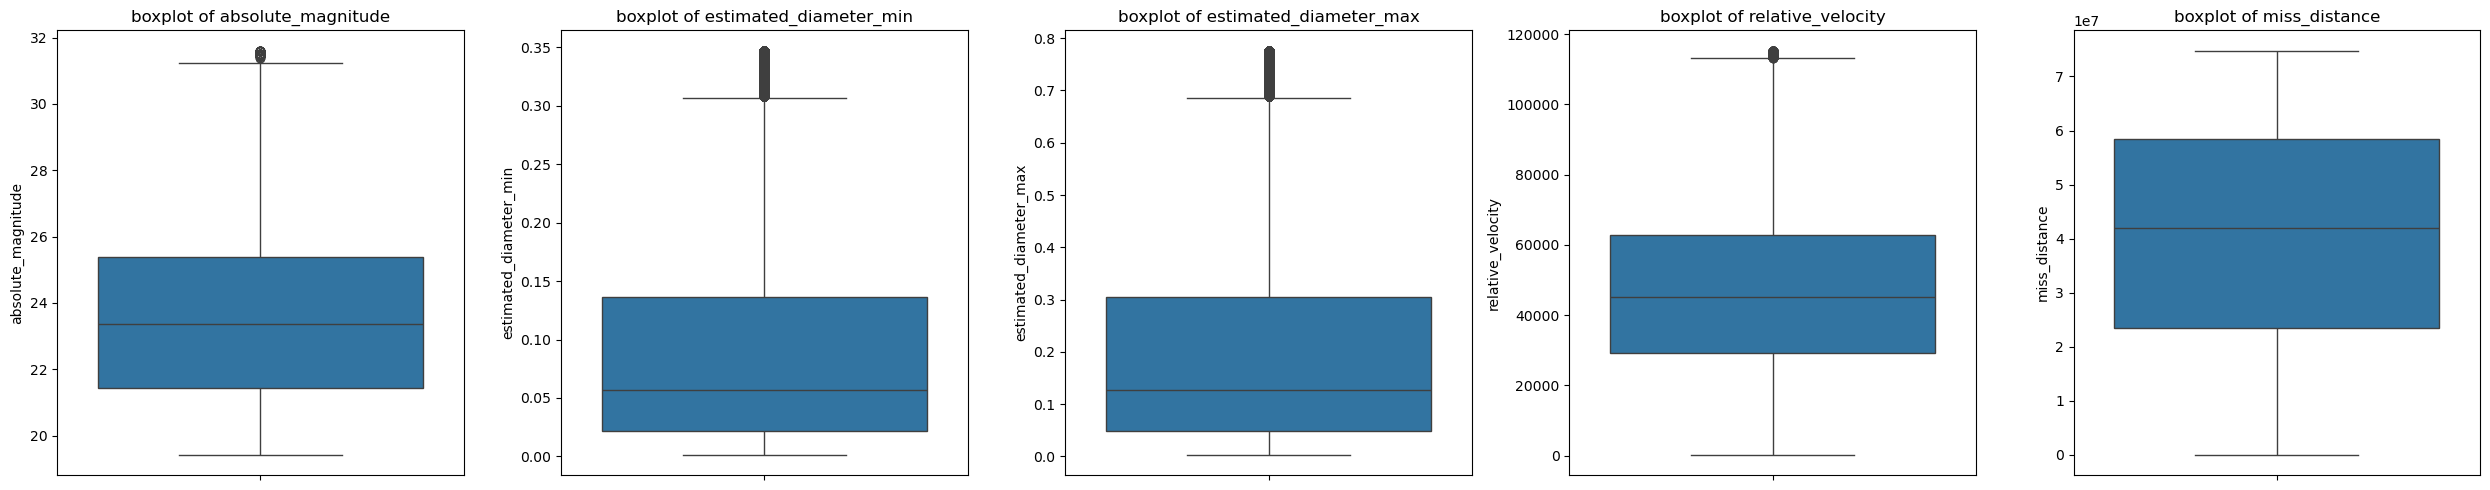

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

#Creating subplots featuring the distribution of values for each column in the form of a boxplot
numeric_cols_neos = df_neos.select_dtypes(include=np.number).columns

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(25,5))

for ax, col in zip(axes, numeric_cols_neos):
    sns.boxplot(data=df_neos, y=col, ax=ax)
    ax.set_title(f'boxplot of {col}')

plt.tight_layout()

plt.show()

#### Saving the dataset after the previous preprocessing steps

In [53]:
df_neos.to_csv('neos_classification.csv')